In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


In [7]:
base = pd.read_csv('Eleicao.csv', sep = ';')

In [9]:
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


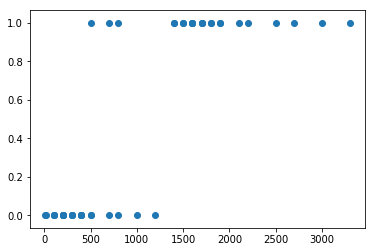

In [10]:

plt.scatter(base.DESPESAS, base.SITUACAO)

In [11]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [12]:
#visualizando a correlação

np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [13]:
X = base.iloc[:, 2].values


In [14]:
X = X[:, np.newaxis ]

In [15]:
y= base.iloc[:, 1].values

In [16]:
#criando o modelo
modelo = LogisticRegression()
modelo.fit(X, y)

/home/cleano/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#inclinação
modelo.coef_

array([[0.00298895]])

In [18]:
#interceptação
modelo.intercept_

array([-2.41847443])

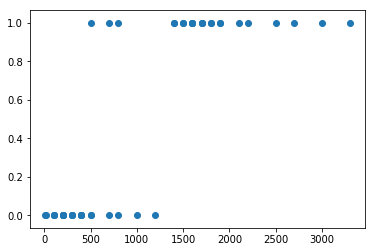

In [19]:
plt.scatter(X, y)



In [21]:
#vamos gerar números aleatorios, e escolhemos 100 números
X_teste = np.linspace(10, 3000, 100)

In [22]:
X_teste

array([  10.        ,   40.2020202 ,   70.4040404 ,  100.60606061,
        130.80808081,  161.01010101,  191.21212121,  221.41414141,
        251.61616162,  281.81818182,  312.02020202,  342.22222222,
        372.42424242,  402.62626263,  432.82828283,  463.03030303,
        493.23232323,  523.43434343,  553.63636364,  583.83838384,
        614.04040404,  644.24242424,  674.44444444,  704.64646465,
        734.84848485,  765.05050505,  795.25252525,  825.45454545,
        855.65656566,  885.85858586,  916.06060606,  946.26262626,
        976.46464646, 1006.66666667, 1036.86868687, 1067.07070707,
       1097.27272727, 1127.47474747, 1157.67676768, 1187.87878788,
       1218.08080808, 1248.28282828, 1278.48484848, 1308.68686869,
       1338.88888889, 1369.09090909, 1399.29292929, 1429.49494949,
       1459.6969697 , 1489.8989899 , 1520.1010101 , 1550.3030303 ,
       1580.50505051, 1610.70707071, 1640.90909091, 1671.11111111,
       1701.31313131, 1731.51515152, 1761.71717172, 1791.91919

In [28]:
#vai retornar a função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))

resultado = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()


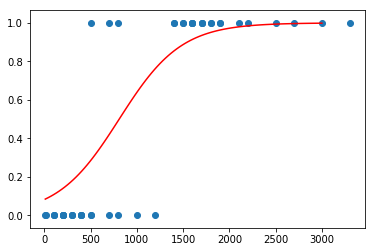

In [30]:
plt.scatter(X, y)

plt.plot(X_teste, resultado, color= 'red')

In [31]:
base_previsoes = pd.read_csv("NovosCandidatos.csv", sep=";")

In [32]:
base_previsoes.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [33]:
despesas = base_previsoes.iloc[:, 1].values


In [34]:
despesas = despesas.reshape(-1, 1)

In [35]:
despesas

array([[   0],
       [  10],
       [ 200],
       [ 500],
       [ 900],
       [1500],
       [3000]])

In [36]:
previsoes_teste = modelo.predict(despesas)

In [37]:
print(previsoes_teste)

[0 0 0 0 1 1 1]


In [38]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))

In [39]:
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 1],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)